<a href="https://colab.research.google.com/github/SinghNavnoor/Drug_classification_prediction/blob/main/drug_classification_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Navnoor Singh Kahlon

## Preparing and Cleaning the data

### Importing the data

In [241]:
#importing pandas
import pandas as pd

#defining the data with a variable
df = pd.read_csv('/content/drug_data.csv')
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [242]:
#getting a look at the data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [243]:
#looking at the shape of the data
df.shape

(296, 6)

### Looking for duplicate values 

In [244]:
#finding total duplicates
df.duplicated().sum()

15

In [245]:
#Dropping the duplicate values. 
df = df.drop_duplicates()

In [246]:
# Checking to see if there are any other duplicates left
df.duplicated().sum()

0

In [247]:
#looking at the shape after dropping duplicates
df.shape

(281, 6)

### Looking for missing values

In [248]:
#summing up all the null values in every column
df.isna().sum()

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

##### The age and BP column has missing values. 

#### Exploring the Age and BP columns 

##### Age

In [249]:
#Age value counts 
df['Age'].value_counts()

36.0     8
55.0     7
61.0     7
32.0     7
42.0     7
26.0     6
39.0     6
67.0     6
53.0     6
37.0     6
60.0     6
23.0     6
43.0     6
31.0     6
28.0     6
57.0     5
70.0     5
49.0     5
47.0     4
40.0     4
24.0     4
45.0     4
19.0     4
48.0     4
50.0     4
65.0     4
56.0     4
59.0     4
58.0     4
69.0     4
29.0     4
44.0     4
20.0     4
74.0     3
35.0     3
66.0     3
73.0     3
72.0     3
62.0     3
18.0     3
22.0     3
54.0     3
71.0     2
41.0     2
64.0     2
51.0     2
21.0     2
30.0     2
52.0     2
34.0     2
38.0     2
15.0     2
16.0     2
46.0     2
63.0     1
33.0     1
25.0     1
570.0    1
68.0     1
Name: Age, dtype: int64

Going to impute the missing values of Age with its mean because that will give us the best number to fill the null values and not loose any rows. 

In [250]:
#getting the mean of column Age
age_mean = df['Age'].mean()
age_mean

47.47577092511013

In [251]:
#imputting null values in Age with the age_mean
df['Age'].fillna(age_mean, inplace=True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [252]:
#confirming that Age has zero null values now
df.isna().sum()

Age             0
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

#### BP

In [253]:
df['BP'].value_counts()

High      128
Normal     46
Low        32
Name: BP, dtype: int64

Going to fill the null values of BP with the mode value because it gives us a good guess of what the value would be and not loose any rows. 

In [254]:
#Replacing all missing values with mode: High
df['BP'].fillna('High', inplace=True)

In [255]:
#checking on the BP column
df['BP'].value_counts()

High      203
Normal     46
Low        32
Name: BP, dtype: int64

In [256]:
#confirming no more null values exist
df.isna().sum()

Age            0
Gender         0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Checking if dtypes match their actual descriptions. 

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          281 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           281 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    object 
 5   Drug         281 non-null    object 
dtypes: float64(1), object(5)
memory usage: 15.4+ KB


In [258]:
df.head(2)

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ


#### Na_to_K should be float NOT object.

#### Fixing dtype for Na_to_K

##### While changing the dtype to float64 I got a error because one of the values has a '_' at the end. So I will be removing that using str.replace and then converting it to float. 

In [259]:
#dealing with '_' in the column
df['Na_to_K'] = df['Na_to_K'].str.replace('_','').astype(float)
#source: https://stackoverflow.com/questions/64729222/how-to-remove-sign-from-float-dtype-object-but-containing-values-with-si

In [260]:
#converting Na_to_K into a float64
df['Na_to_K'].astype('float64')

0      13.935
1      10.103
2       9.084
3      16.594
4      10.977
        ...  
290    18.295
292    10.065
293    11.014
294     9.475
295    12.879
Name: Na_to_K, Length: 281, dtype: float64

In [261]:
#confirming that all the dtypes are correct. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          281 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           281 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


### Looking for inconsistencies

##### Inconsistencies in Object types. 

In [262]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for Gender are:
M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64
-----------------------------------------------

___
The count values for BP are:
High      203
Normal     46
Low        32
Name: BP, dtype: int64
-----------------------------------------------

___
The count values for Cholesterol are:
HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64
-----------------------------------------------

___
The count values for Drug are:
drugZ    147
drugQ    134
Name: Drug, dtype: int64
-----------------------------------------------

___


##### Our Target column has no inconsistencies. 
##### The Gender and Cholesterol feature columns do have inconsistencies and I will be working on them. 

##### Fixing inconsistencies in the Gender Columns. 

In [263]:
#using .replace to fix the column 
df.replace({'Gender' : {'male' : 'M',
                    'female': 'F',
                    'Female' : 'F',
                    'Male': 'M',
                    'femal': 'F',
                    'Femal': 'F'}}, inplace=True)

##### Fixing inconsistencies in the Cholesterol Columns. 

In [264]:
#using .replace() to fix the column
df.replace({'Cholesterol' : {'norm' : 'Normal',
                             'NORMAL': 'Normal',
                             'HIGH': 'High',
                             'high': 'High',
                             'NORM': 'Normal'}}, inplace=True)

In [265]:
#Confirming no inconsistencies remain in the object column 
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for Gender are:
M    145
F    136
Name: Gender, dtype: int64
-----------------------------------------------

___
The count values for BP are:
High      203
Normal     46
Low        32
Name: BP, dtype: int64
-----------------------------------------------

___
The count values for Cholesterol are:
High      152
Normal    129
Name: Cholesterol, dtype: int64
-----------------------------------------------

___
The count values for Drug are:
drugZ    147
drugQ    134
Name: Drug, dtype: int64
-----------------------------------------------

___


#### Inconsistent in the numeric columns. 

In [266]:
#creating the same loop to see values counts in numeric columns. 
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == 'float64':
    print(f'The count values for {i} are:')
    print(df[i].value_counts(ascending=True))
    print('-----------------------------------------------')
    print('\n___')

The count values for Age are:
68.000000      1
63.000000      1
33.000000      1
25.000000      1
570.000000     1
34.000000      2
46.000000      2
51.000000      2
16.000000      2
15.000000      2
38.000000      2
41.000000      2
52.000000      2
30.000000      2
71.000000      2
64.000000      2
21.000000      2
22.000000      3
54.000000      3
66.000000      3
73.000000      3
74.000000      3
62.000000      3
18.000000      3
35.000000      3
72.000000      3
47.000000      4
40.000000      4
50.000000      4
48.000000      4
19.000000      4
24.000000      4
29.000000      4
69.000000      4
44.000000      4
59.000000      4
45.000000      4
65.000000      4
20.000000      4
58.000000      4
56.000000      4
57.000000      5
70.000000      5
49.000000      5
37.000000      6
67.000000      6
39.000000      6
53.000000      6
60.000000      6
28.000000      6
43.000000      6
26.000000      6
31.000000      6
23.000000      6
61.000000      7
55.000000      7
32.000000      7
4

##### To better look for any inconsistencies going to get the summary stats of the numerical columns as well. 

In [267]:
#Creating loop to get the summary stats of Numerical columns. 
for i in all_columns:
  if df[i].dtypes == float:
    m = df[i].mean()
    max = df[i].max()
    min = df[i].min()
    mode = df[i].mode()
    print(f"The {df[i].name}:")
    #print(f"The {df[i].name}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}, Mode ={mode}')
    print('--------------' * 4)
    print('\n')

The Age:
Mean = 47.47577092511013, Max = 570.0, Min = 15.0, Mode =0    47.475771
dtype: float64
--------------------------------------------------------


The Na_to_K:
Mean = 14.862768683274021, Max = 38.247, Min = 6.269, Mode =0    12.766
dtype: float64
--------------------------------------------------------




##### In the Age column we have one value that is at 570, we will be replacing that. 


In [268]:
#Using .replace() to convert 570 to 57
df['Age'] = df['Age'].replace(570.0, 57)
#source = https://www.geeksforgeeks.org/how-to-replace-values-in-a-list-in-python/

##### Confirming that the problem was fixed

In [269]:
#looping through the numeric columns
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == 'float64':
    print(f'The count values for {i} are:')
    print(df[i].value_counts(ascending=True))
    print('-----------------------------------------------')
    print('\n___')

The count values for Age are:
68.000000     1
33.000000     1
63.000000     1
25.000000     1
46.000000     2
51.000000     2
16.000000     2
15.000000     2
38.000000     2
41.000000     2
21.000000     2
52.000000     2
30.000000     2
71.000000     2
64.000000     2
34.000000     2
22.000000     3
54.000000     3
66.000000     3
73.000000     3
74.000000     3
72.000000     3
18.000000     3
35.000000     3
62.000000     3
47.000000     4
29.000000     4
69.000000     4
24.000000     4
45.000000     4
65.000000     4
59.000000     4
58.000000     4
44.000000     4
20.000000     4
19.000000     4
48.000000     4
50.000000     4
40.000000     4
56.000000     4
70.000000     5
49.000000     5
53.000000     6
57.000000     6
60.000000     6
26.000000     6
31.000000     6
23.000000     6
39.000000     6
67.000000     6
37.000000     6
28.000000     6
43.000000     6
61.000000     7
55.000000     7
42.000000     7
32.000000     7
36.000000     8
47.475771    54
Name: Age, dtype: int64
--

In [270]:
#Looping through the summary stats
for i in all_columns:
  if df[i].dtypes == float:
    m = df[i].mean()
    max = df[i].max()
    min = df[i].min()
    mode = df[i].mode()
    print(f"The {df[i].name}:")
    #print(f"The {df[i].name}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}, Mode = {mode}')
    print('--------------' * 4)
    print('\n')

The Age:
Mean = 45.65014814930942, Max = 74.0, Min = 15.0, Mode = 0    47.475771
dtype: float64
--------------------------------------------------------


The Na_to_K:
Mean = 14.862768683274021, Max = 38.247, Min = 6.269, Mode = 0    12.766
dtype: float64
--------------------------------------------------------




## Data Exploration 

In [271]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the Correlation between the columns. 

In [272]:
#defining correlation
correlation = df.corr()
#printing correlation 
correlation

,Age,Na_to_K
Age,1.000000,-0.037316
Na_to_K,-0.037316,1.000000


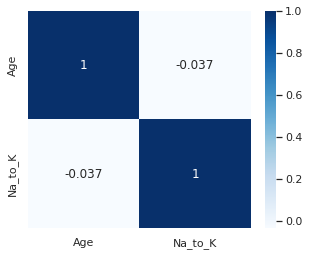

In [273]:
#graphing the correlation. 
sns.set(rc = {'figure.figsize' : (5,4)});
sns.heatmap(correlation, cmap = 'Blues', annot = True);

#### Observation: 
- Age and Sodium to Potassium ratio are negatively related. However, we must remember that correlation does not mean causation. 
- Also, Sodium to Potassium ratio does have much to do with the Age of a person. Its about their physical condition.

### Exploring the numeric columns with histograms and boxplots

#### Age

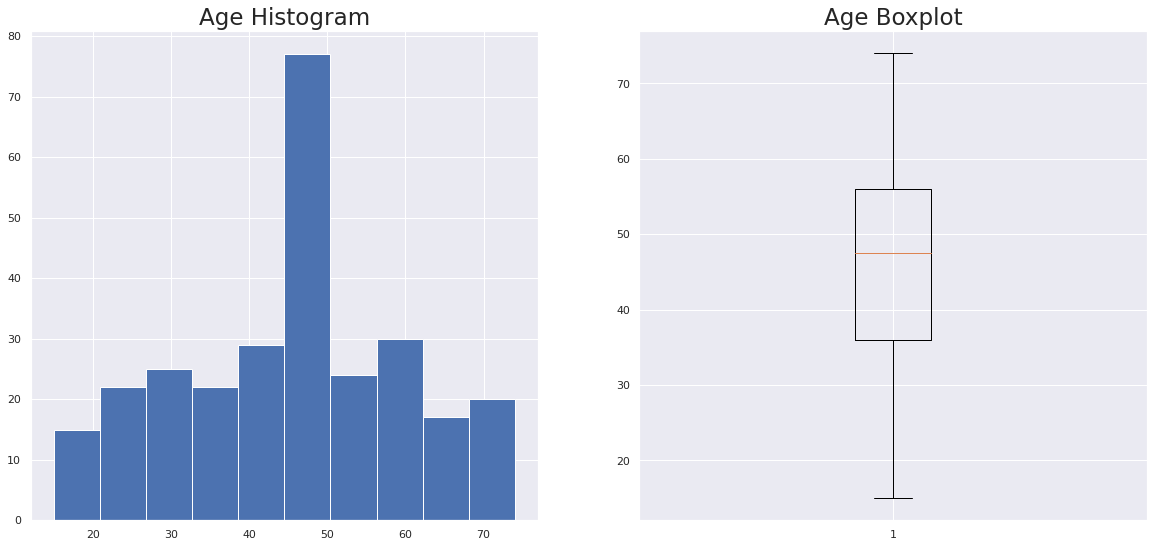

In [274]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['Age'].values);
plt.title("Age Histogram", fontsize=23)

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['Age'].values);
plt.title('Age Boxplot', fontsize=23);

##### Observation:
- The histogram is very normally distributed. 
- There is one hike in the middle. 
- The boxplot does not have any outliers. 
- The boxplot also shows that while the IDR is between 37 and 55, the min goes down to 10 and the max all the upto 74. 

#### Na_to_K

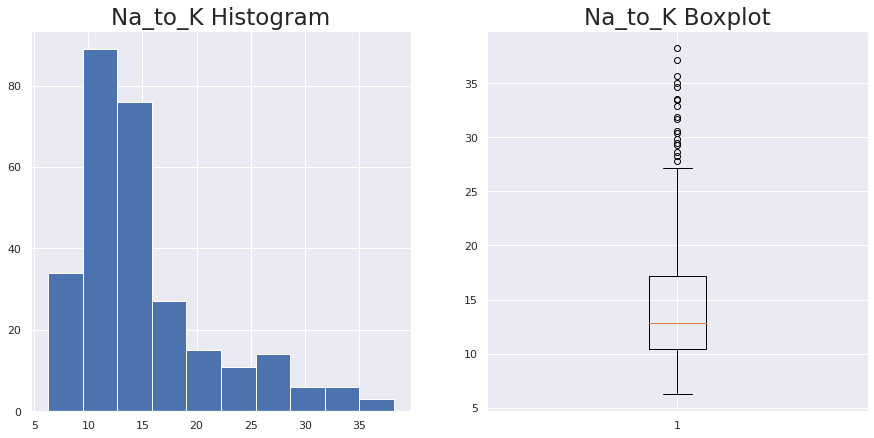

In [275]:
#Setting the figure size:
plt.figure(figsize = (15,7))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['Na_to_K'].values);
plt.title('Na_to_K Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['Na_to_K'].values);
plt.title('Na_to_K Boxplot',fontsize=23);

##### Observations: 
- The histogram is right skewed. 
- The skewed histogram means that majority of the Sodium to Postassium ratios are between 5 and 20. This is better than having most of them beyond 20 (which we still have many of). 
- The boxplot shows us that there are many outliers which is concerning. 


### Exploring two variables using barplots. 

#### Age vs. Gender

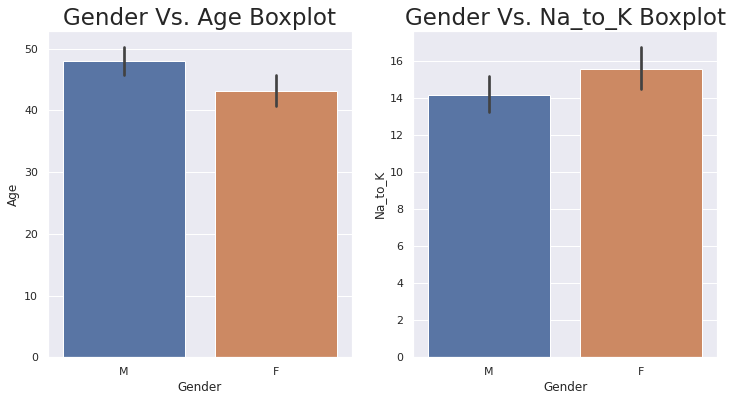

In [276]:
#Setting the figure size:
plt.figure(figsize = (12,6))

#Histogram
plt.subplot(1, 2, 1);
sns.barplot(x = 'Gender', y = 'Age', data = df);
plt.title('Gender Vs. Age Boxplot', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
sns.barplot(x = 'Gender', y = 'Na_to_K', data = df);
plt.title('Gender Vs. Na_to_K Boxplot',fontsize=23);



##### Observations: 
- This dataset,on average, have older men than women. 
- Women, on average, have higher Sodium to Potassium ratios.   

#### Cholesterol vs. Age

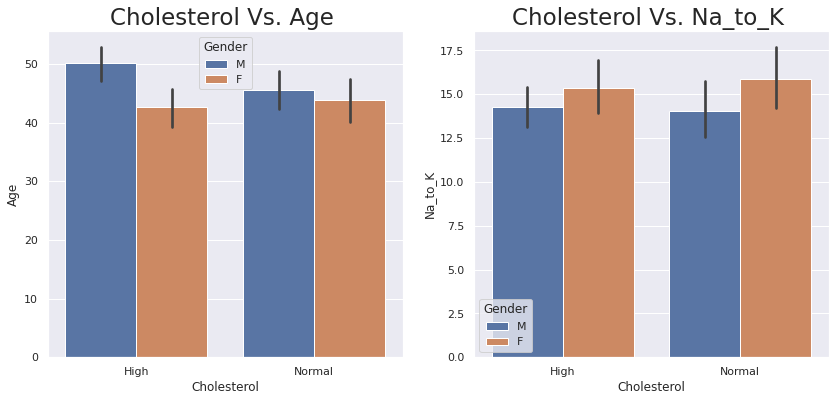

In [277]:
#Setting the figure size:
plt.figure(figsize = (14,6))

#Histogram
plt.subplot(1, 2, 1);
sns.barplot(x = 'Cholesterol', y = 'Age', hue = 'Gender', data = df);
plt.title('Cholesterol Vs. Age ', fontsize= 23);

#Boxplot
plt.subplot(1, 2, 2);
sns.barplot(x = 'Cholesterol', y = 'Na_to_K',hue = 'Gender', data = df);
plt.title('Cholesterol Vs. Na_to_K ', fontsize= 23);

##### Observations:
- Men, on average, have higher cholesterol levels than women in both the High and Normal categories of cholestral. 
- Women, on average, have higher Sodium to Potassium ratio than men in both the High and Normal categories of cholesteral.  

#### Drug vs. Age

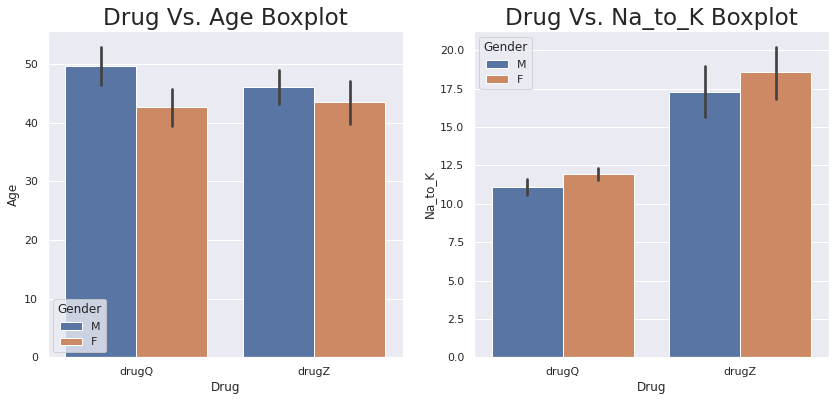

In [278]:
#Setting the figure size:
plt.figure(figsize = (14,6))

#Histogram
plt.subplot(1, 2, 1);
sns.barplot(x = 'Drug', y = 'Age', hue = 'Gender', data = df);
plt.title('Drug Vs. Age Boxplot', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
sns.barplot(x = 'Drug', y = 'Na_to_K', hue = 'Gender', data = df);
plt.title('Drug Vs. Na_to_K Boxplot' ,fontsize=23);

##### Obervations:
- drugQ and drugZ were recommended more to older men then women. 
- Women who were recommended drugQ and drugZ also had higher Sodium to Potassium ratio than men. 

## Model Preparation, Processing & Transformation

#### Creating a Copy of the dataset. 

In [279]:
#copy of the dataset
eda_df = df.copy()
eda_df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.000000,M,High,High,13.935,drugQ
1,40.000000,F,Normal,High,10.103,drugZ
2,47.475771,M,Normal,High,9.084,drugZ
3,62.000000,M,Normal,High,16.594,drugZ
4,55.000000,F,High,Normal,10.977,drugQ


In [280]:
#confirming that dtypes are still correct
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          281 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           281 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.5+ KB


#### Checking for duplicates. 

In [281]:
eda_df.duplicated().sum()

9

These duplicated values must have come up after imputing the null values with mean and most frequent. 

In [282]:
#dropping these duplicates. 
eda_df.drop_duplicates(inplace=True)

In [283]:
#confirming now further duplicates
eda_df.duplicated().sum()

0

### Giving the Target numerical values for model building. 

In [284]:
#using .replace() to convert
eda_df['Drug'] = eda_df['Drug'].replace({'drugZ':0,
                                 'drugQ': 1})

### Splitting the data.

In [285]:
X = eda_df.drop(columns= 'Drug')
y = eda_df['Drug']

y.head()

0    1
1    0
2    0
3    0
4    1
Name: Drug, dtype: int64

In [286]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

X_test.head()

,Age,Gender,BP,Cholesterol,Na_to_K
30,47.475771,M,High,High,13.967
122,36.000000,M,Low,Normal,11.424
80,47.475771,M,High,Normal,28.294
134,41.000000,M,High,Normal,15.156
209,47.475771,M,High,Normal,11.343


### Column selectors

In [287]:
#importing column selectors and transformers
from sklearn.compose import make_column_selector, make_column_transformer
#importing set_confi to get nice visuals of our models
from sklearn import set_config
set_config(display='diagram');

#initializing categorical selector
cat_selector = make_column_selector(dtype_include= 'object')

#initializing numeric selector
num_selector = make_column_selector(dtype_include= 'number')

#### We have to Standarize the numeric columns and one hot encode the categorical columns. 
#### Using One Hot Encoder because BP has three classes and converting them into 0,1,and 2 will give it more power as every other columns will be between or equal to 0 and 1. 

### Standarizers and One Hot Encoding

In [288]:
#importing Standard Scaler and OneHotencoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#importing make_pipeline
from sklearn.pipeline import make_pipeline

#Initializing StandardScaler
scaler = StandardScaler()

#Initializing OneHotEncoder
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

### Creating Tuples

In [289]:
#Creating tuples for column transformation
num_tuple = (scaler,num_selector)
cat_tuple = (ohe, cat_selector)

### Creating a Preprocessor

In [290]:
#preprocessing the dataset. 
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2d0de5b50>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2d0de58e0>)])

### Fitting the data

In [291]:
#fitting the preprcessor to X_train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2d0de5b50>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2d0de58e0>)])

### Transforming X_train and X_test

In [292]:
#X_train transformed
X_train_processed = preprocessor.transform(X_train)

#X_test transformed
X_test_processed = preprocessor.transform(X_test)

### Looking at the results

In [293]:
#importing numpy
import numpy as np

#Printing any missing values in the feature columns.
print("X_train has", np.isnan(X_train_processed).sum().sum(), "missing values")
print("X_test has", np.isnan(X_test_processed).sum().sum(), "missing values")
print('----------------------------------------')
print("\n")

#Printing the dtypes. 
print('The X_train has:', X_train_processed.dtype)
print('The X_test has:', X_test_processed.dtype)
print('----------------------------------------')
print("\n")

#Printing the shape of the datasets.
print('The shape of X_train is', X_train_processed.shape)
print('The shape of X_test is', X_test_processed.shape)
print('----------------------------------------')
print("\n")

#Printing a sample of the X_train_processed dataset:
print("X_train_processed example:")
print("\n")
print(X_train_processed[2:6])
print('----------------------------------------')
print("\n")

#Printing a sample of the X_test_processed dataset:
print("X_test_processed example:")
print("\n")
print(X_test_processed[7:8])
print('----------------------------------------')

X_train has 0 missing values
X_test has 0 missing values
----------------------------------------


The X_train has: float64
The X_test has: float64
----------------------------------------


The shape of X_train is (204, 9)
The shape of X_test is (68, 9)
----------------------------------------


X_train_processed example:


[[-1.67540706 -1.01889016  1.          0.          1.          0.
   0.          1.          0.        ]
 [ 0.15376478 -0.65638578  1.          0.          1.          0.
   0.          1.          0.        ]
 [ 0.18998299  0.09754706  1.          0.          0.          1.
   0.          1.          0.        ]
 [-0.56999074 -0.86680042  0.          1.          0.          1.
   0.          0.          1.        ]]
----------------------------------------


X_test_processed example:


[[-0.98452186  2.53384351  0.          1.          1.          0.
   0.          1.          0.        ]]
----------------------------------------


## Machine Learning Models

### Logistic Regression Model

#### Default Logistic Regression Model

In [294]:
#importing Logistic Regression. 
from sklearn.linear_model import LogisticRegression

#initializing the model 
log_reg = LogisticRegression()

#making a pipeline
log_reg_pipeline = make_pipeline(preprocessor, log_reg)

#fitting the data
log_reg_pipeline.fit(X_train, y_train)

#predicting
log_default_pred_X_test = log_reg_pipeline.predict(X_test)

#printing prediction
log_default_pred_X_test


array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

##### Default Logistic Regression model score

In [295]:
print("Log default model train score" + " "+ str(log_reg_pipeline.score(X_train, y_train)))
print("Log default model test score" + " "+ str(log_reg_pipeline.score(X_test, y_test)))

Log default model train score 0.946078431372549
Log default model test score 0.9264705882352942


#### Confusion Matrix

In [296]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

#predicting
pred = log_reg_pipeline.predict(X_test)

#creating a confusion matrix
c_mat = confusion_matrix(y_test, pred, normalize='true')

#turning the confusion matrix into a DataFrame
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.880952,0.119048
1,0.000000,1.000000


##### Displaying the confusion matrix

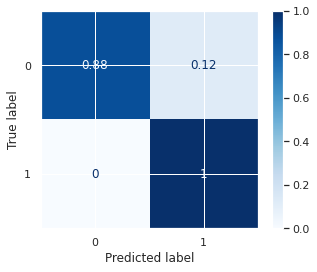

In [297]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true', cmap = 'Blues' );

#### Hypertuning Logistic Regression Model

##### L1 Tuning
##### Solver = Saga

Test Scores:


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{0.001: 0.6176470588235294,
 0.01: 0.6176470588235294,
 0.1: 0.9117647058823529,
 1.0: 0.9264705882352942,
 10.0: 0.9117647058823529,
 100.0: 0.9117647058823529,
 1000.0: 0.9117647058823529}

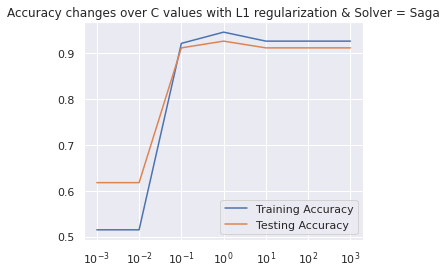

In [298]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

#creating an emtpy train score variable
train_score = []

#creating an emtpy test score variable
test_score = []

#creating a loop to get the best c_value
for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

At C= 0.1 the test accuracy goes higher than the train. 

##### L1 Tuning
##### Solver = liblinear

Test Scores:


{0.001: 0.6176470588235294,
 0.01: 0.6176470588235294,
 0.1: 0.8676470588235294,
 1.0: 0.9264705882352942,
 10.0: 0.9117647058823529,
 100.0: 0.9117647058823529,
 1000.0: 0.9117647058823529}

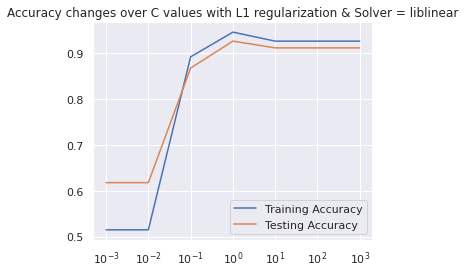

In [299]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

The model prediction goes flat after C = 10

With Penaly = L1, Solver = Saga or Liblinear, the best/ reliable C values we are getting is 10.0, 100.0 & 1000.0

##### L2 Tuning
##### Solver = Saga

Test Scores:


{0.001: 0.6470588235294118,
 0.01: 0.8823529411764706,
 0.1: 0.8970588235294118,
 1.0: 0.9264705882352942,
 10.0: 0.9117647058823529,
 100.0: 0.9117647058823529,
 1000.0: 0.9117647058823529}

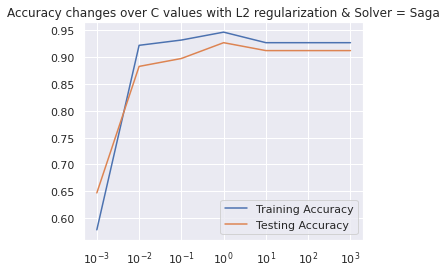

In [300]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

The model flattens at and after C = 1.0

##### L2 Tuning
##### Solver = Liblinear

Test Scores:


{0.001: 0.8529411764705882,
 0.01: 0.8529411764705882,
 0.1: 0.8970588235294118,
 1.0: 0.9264705882352942,
 10.0: 0.9117647058823529,
 100.0: 0.9117647058823529,
 1000.0: 0.9117647058823529}

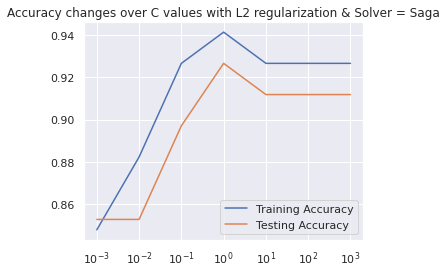

In [301]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

While we see a flat curve for testing score, the training curve has more variation. 

### Logistic Regression Model choice
- Penalty = L2
- Solver = Saga
- C = 10.0

#### Logistic Regression Tuned Model 

In [302]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=10.0, max_iter=1000, solver='saga', penalty='l2')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [303]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.880952,0.119048
1,0.038462,0.961538


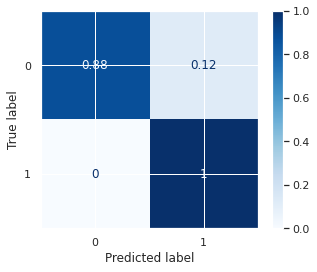

In [304]:
# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true', cmap = 'Blues' );

The tuned model gave very similar scores. 

### KNN default model

In [305]:
#importing KNN Classifier model. 
from sklearn.neighbors import KNeighborsClassifier

#initializing KNN models. 
knn = KNeighborsClassifier(n_neighbors=1)

#creating a pipeline 
knn_prep_pipe = make_pipeline(preprocessor, knn) 

#fitting the data 
knn_prep_pipe.fit(X_train, y_train) 

#making predictions 
knn_default_predictions_test = knn_prep_pipe.predict(X_test) 
knn_default_predictions_test

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

#### Printing the models

In [306]:
#printing the scores of both training and testing model 
print("Log default model train score" + " "+ str(knn_prep_pipe.score(X_train, y_train)))
print("Log default model test score" + " "+ str(knn_prep_pipe.score(X_test, y_test)))

Log default model train score 1.0
Log default model test score 0.8823529411764706


#### Confusion Matrix

In [307]:
#creating a confusion matrix
knn_c_mat = confusion_matrix(y_test, knn_default_predictions_test, normalize='true')

#converting the matrix into a dataframe
cmat_df = pd.DataFrame(knn_c_mat)
cmat_df

,0,1
0,0.809524,0.190476
1,0.000000,1.000000


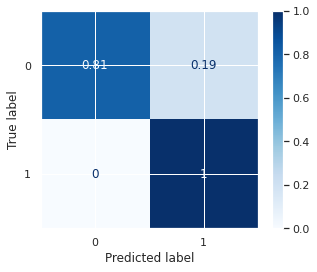

In [308]:
#diplaying the matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_default_predictions_test, normalize='true', cmap = 'Blues' );

This model is not bettwe than the tuned Logistic Regression Model. 

### Tuning KNN model 

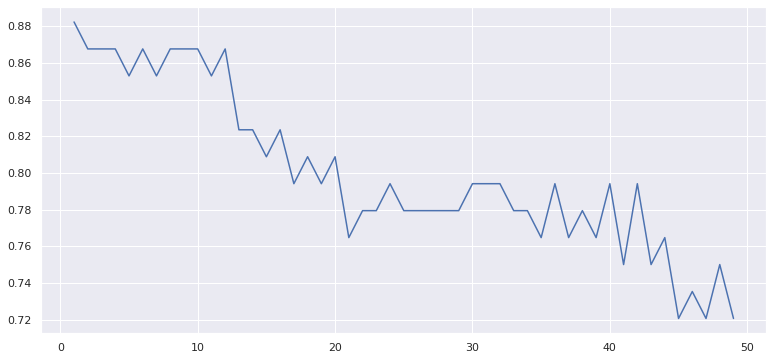

The best accuracy 0.8823529411764706. 
The best n_neighbor score 1. 


In [309]:
#importing the accuracy score
from sklearn.metrics import accuracy_score 

#setting a knn range
knn_range = range(1,50)
#creating an empty test_accuracy variable
test_accuracy = []
#Setting best_accuracy and best_k variables to zero as they will be appended soon
best_accuracy = 0
best_k = 0

#creating a loop to find the best n_neighbors for the model. 
for k in knn_range:
  #initialing KNN
  knn = KNeighborsClassifier(n_neighbors=k)

  #creating the pipeline of preprocessor and KNN
  knn_prep_pipe = make_pipeline(preprocessor, knn)
  
  #fitting the model. 
  knn_prep_pipe.fit(X_train, y_train)

  #predicting and finding the accuracy of the model. 
  predict_test = knn_prep_pipe.predict(X_test)

  #creating an accuracy variable
  acc = accuracy_score(y_test, predict_test)

  #finding the best accuracy and the best k values
  if acc > best_accuracy:
    best_accuracy = acc
    best_k = k

  #appending the best values to test_accuracy
  test_accuracy.append(acc)

#plotting the findings
plt.figure(figsize = (13,6))
plt.plot(knn_range, test_accuracy, label = 'Best KNN Scores')
plt.show()

#best k value and best accuracy
print(f'The best accuracy {best_accuracy}. \nThe best n_neighbor score {best_k}. ')

With n_neighbor = 5, we get our best score of 97%

#### Creating the tuned KNN model.

In [310]:
#creating a pipeline
tuned_knn_model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors= 5))

#fitting the model 
tuned_knn_model.fit(X_train, y_train)

#making the predictions
tuned_knn_predict = tuned_knn_model.predict(X_test)
tuned_knn_predict

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1])

In [311]:
#creating a confusion matrix
tuned_knn_c_mat = confusion_matrix(y_test, tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
tuned_cmat_df

,0,1
0,0.761905,0.238095
1,0.000000,1.000000


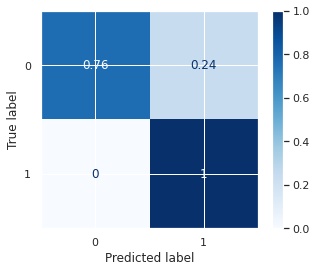

In [312]:
#displaying the matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_predict, cmap='Blues',normalize='true');

##### This tuned KNN model one hundred percent correctly predicted the True Positives.
##### The True Negatives are also better than any other model. 

##### 0 = drugZ
##### 1 = drugQ
##### P.S. here true positive means drugQ and true negative mean drugZ


## Best Model & its Justification:
### KNN with n_neighbors = 5 is the best model.
### This model had the lowest False Negatives and False Positives. In other words, it made the least mistake predicting whether the patient should receive drugQ or drugZ